 # AUTOMATIC CHORD-SCALE DETECTION & STUDENT PERFORMANCE ASSESMENT FOR JAZZ IMPROVISATION 
 
 ## PART 2 : ANALYSIS ON MUSICCRITIC: SCALE EXERCISE 

In [1]:
import sys,os
sys.path.append(os.path.join(os.path.dirname('__file__'), 'freesound-python/'))

from IPython.display import Audio
from IPython.core.display import display, HTML, Image

from utilities import *

#Directory for audio files
audioDir = 'audio/'
#Directory for audio segment annotations
annotationsDir = 'scale_annotations/'
#Directory for Feature Data (.csv and pickle files)
dataDir = 'data/'

#ANALYSIS PARAMETERS FOR FEATURE EXTRACTION

params=AnalysisParams(200,100,'hann',2048,44100,12)

#MUSICCRITIC ANALYSIS PARAMETERS

FILEDIR = 'chord-scale_exercise/'
FILENAME = 'scalesexercise_solo1.mp3'
EXERCISEFILE = 'exercise.json'
IMAGEPATH = 'img/'
if os.path.exists(IMAGEPATH) != 1:
    os.mkdir(IMAGEPATH)

#INITIATE PROPER DATA STRUCTURE
dataDictionary = createDataStructure(annotationsDir) 

In [2]:
### FIRST, LET'S DEFINE A DICTIONARY THAT CONTAINS ALL THE PREDEFINED SCALE TEMPLATES

ScaleTemplates = dict()
    
ScaleTemplates['major'] = {'scaleArray':[1,0,1,0,1,1,0,1,0,1,0,1]}
ScaleTemplates['dorian'] = {'scaleArray':[1,0,1,1,0,1,0,1,0,1,1,0]}
ScaleTemplates['phrygian'] = {'scaleArray':[1,1,0,1,0,1,0,1,1,0,1,0]}
ScaleTemplates['lydian'] = {'scaleArray':[1,0,1,0,1,0,1,1,0,1,0,1]}
ScaleTemplates['mixolydian'] = {'scaleArray':[1,0,1,0,1,1,0,1,0,1,1,0]}
ScaleTemplates['minor'] = {'scaleArray':[1,0,1,1,0,1,0,1,1,0,1,0]}
ScaleTemplates['locrian'] = {'scaleArray':[1,1,0,1,0,1,1,0,1,0,1,0]}
ScaleTemplates['lydianb7'] = {'scaleArray':[1,0,1,0,1,0,1,1,0,1,1,0]}
ScaleTemplates['altered'] = {'scaleArray':[1,1,0,1,1,0,1,0,1,0,1,0]}
ScaleTemplates['mminor'] = {'scaleArray':[1,0,1,1,0,1,0,1,0,1,0,1]}
ScaleTemplates['hminor'] = {'scaleArray':[1,0,1,1,0,1,0,1,1,0,0,1]}
ScaleTemplates['hwdiminished'] = {'scaleArray':[1,1,0,1,1,0,1,1,0,1,1,0]}
ScaleTemplates['wholetone'] = {'scaleArray':[1,0,1,0,1,0,1,0,1,0,1,0]}
ScaleTemplates['chromatic'] = {'scaleArray':[1,1,1,1,1,1,1,1,1,1,1,1]}

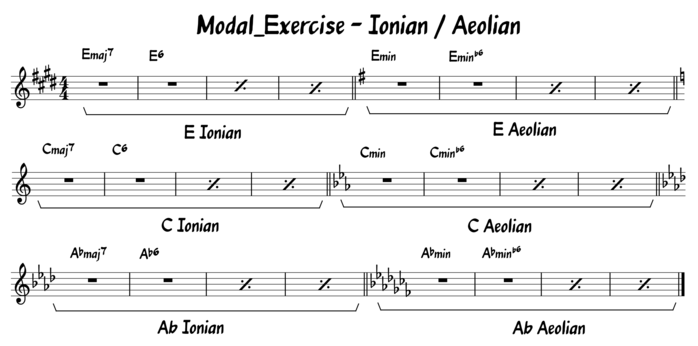

In [11]:
Image(filename = IMAGEPATH + "scalesexercise.png", width=700, height=700)

In [12]:
Audio(os.path.join(FILEDIR, FILENAME))

#### FEATURE EXTRACTION 

In [13]:
FEATURES_Student = FeatureExtraction_single(FILENAME,FILEDIR,params,EXERCISEFILE)

#### ANALYSIS ON SEPERATED REGIONS OF THE EXERCISE

The most likelihood scale of the student performance in Part4 is : 

dorian 



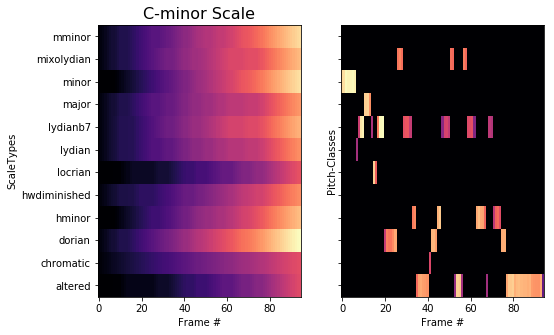

PERFORMANCE ASSESSMENT : 

In-Scale Rate : 88.9392354831 % 

In-Scale Completeness : 100.0 % 

In-Scale Choice Correctness : 85.71428571428571 % 



In [14]:
PART = '4'   ###Select Part for analysis

PartData = FEATURES_Student['Part'+str(PART)]


LikeliestScale = SegmentAnalysis(PartData,ScaleTemplates)



InScaleRate, ScaleChoiceCorrectness, ScaleCompleteness = PerformanceAssessment(PartData,LikeliestScale,ScaleTemplates)

print('PERFORMANCE ASSESSMENT : \n' )

print('In-Scale Rate : ' + str(InScaleRate*100) + ' % \n')
'''
Inscale Rate = sum(InscaleBins.mean)/sum(allBins.mean)
'''
print('In-Scale Completeness : ' + str(ScaleCompleteness*100) + ' % \n')
'''
Completeness = sum(StudentInscaleBins/sum(AllInscaleBins)
'''

print('In-Scale Choice Correctness : ' + str(ScaleChoiceCorrectness*100) + ' % \n')
'''
Cosine Similarity between the binary templates of likeliest scale & Expected Scale
'''

audioSegment = SegmentExerciseAudio(os.path.join(FILEDIR, FILENAME),PartData,params)
Audio(audioSegment, rate = params.fs)